In [18]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Load the dataset
df = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')

# Prepare the data
x = df.drop(columns=['variety'])  # Features
y = df['variety']  # Target variable

In [20]:
x.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
y.head()

,variety
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=97)

In [23]:
# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=97),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(probability=True, random_state=97),
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=97)
}

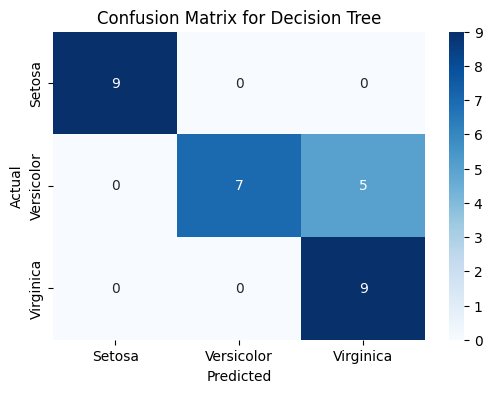

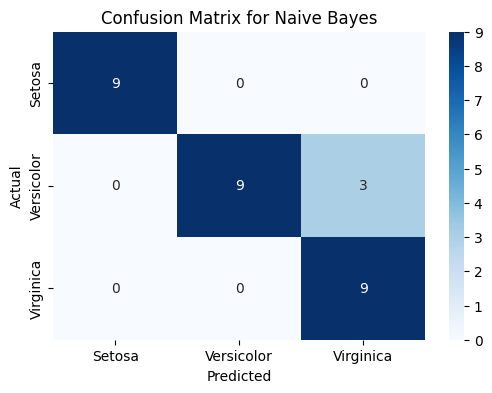

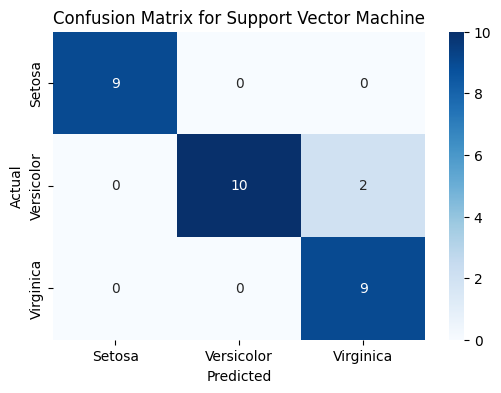

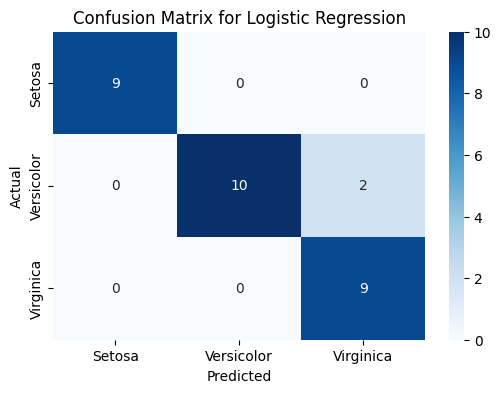

In [33]:
# Dictionary to store performance metrics
performance_metrics = []
# Dictionary to store sensitivity per class
sensitivity_per_class_metrics = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate sensitivity (recall per class)
    cm = confusion_matrix(y_test, y_pred)
    sensitivity_per_class = cm.diagonal() / cm.sum(axis=1)
    sensitivity = sensitivity_per_class.mean()

    # Append metrics
    performance_metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Sensitivity": sensitivity
    })

    # Store sensitivity per class
    sensitivity_per_class_metrics[name] = sensitivity_per_class

    # Display confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [34]:
# Convert performance metrics to DataFrame
metrics_df = pd.DataFrame(performance_metrics)

# Print the performance metrics
print(metrics_df)

                    Model  Accuracy  Precision    Recall  F1-Score  \
0           Decision Tree  0.833333   0.892857  0.833333  0.829519   
1             Naive Bayes  0.900000   0.925000  0.900000  0.900000   
2  Support Vector Machine  0.933333   0.945455  0.933333  0.933636   
3     Logistic Regression  0.933333   0.945455  0.933333  0.933636   

   Sensitivity  
0     0.861111  
1     0.916667  
2     0.944444  
3     0.944444  


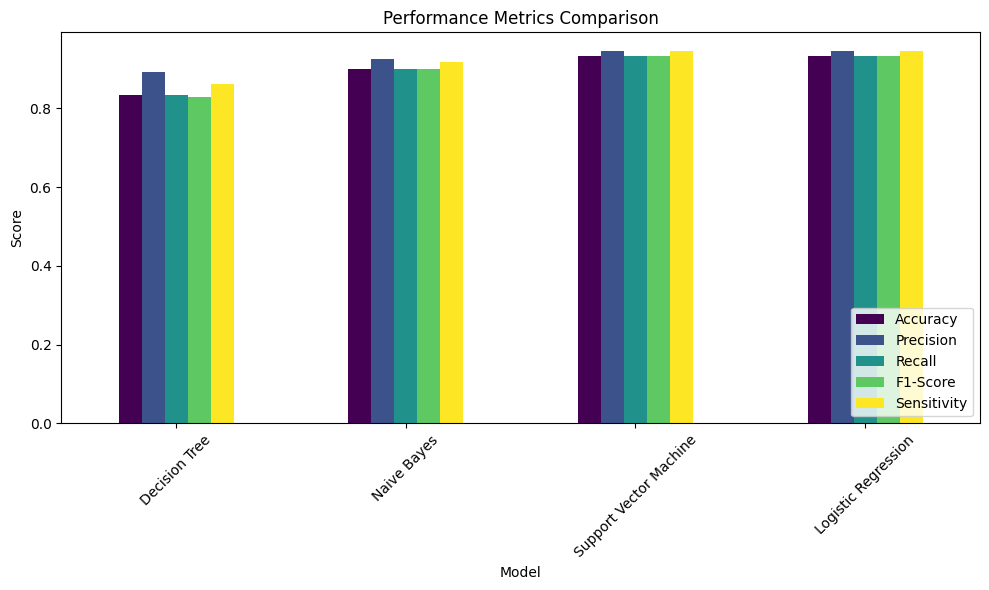

In [32]:
  # Plot performance metrics
import matplotlib.pyplot as plt

metrics_df.set_index('Model', inplace=True)
metrics_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Performance Metrics Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [35]:
#Print sensitivity per class per model
print("\nSensitivity per class for each model:\n")
for model_name, sensitivities in sensitivity_per_class_metrics.items():
    print(f"{model_name}: {sensitivities}")


Sensitivity per class for each model:

Decision Tree: [1.         0.58333333 1.        ]
Naive Bayes: [1.   0.75 1.  ]
Support Vector Machine: [1.         0.83333333 1.        ]
Logistic Regression: [1.         0.83333333 1.        ]
